Step 1. 이것만큼은 꼭 해보세요!
프로젝트에 정답은 없습니다. 배우신 내용을 토대로 자유롭게 데이터를 정제하되, 아래 내용만큼은 반드시 실습해봅시다.

결측치 판단 및 처리
[힌트] 결측치의 유무와 비율을 살펴보고 적절한 방법으로 처리합니다.
이상치 판단 및 처리
[힌트] 숫자형 변수 각각에 대해, 데이터의 index와 변수 값 사이의 scatter plot을 그려보고 이상치가 관찰될 경우 제거합니다.

Step 2. 이런것도 해볼 수 있어요!
자유롭게 실습을 해보시고, 여유가 되면 아래의 내용도 실습해보세요.

택시 탑승 및 하차 시간을 활용할 수 있을지 고민해보세요.
[힌트] 택시의 주행 시간과 주행 거리, 요금 등의 상관 관계도 살펴볼 수 있겠죠?
Credit Card와 Debit Card를 구분없이 "Card"라는 이름으로 만들어 보세요.






In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#pandas , seaborn import하기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
#데이터 불러오기
trip_df = pd.read_csv('/content/drive/MyDrive/아이펠/data/trip.csv')

In [4]:
trip_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [5]:
trip_df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [6]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [7]:
#이름칼럼 삭제하기
trip_df = trip_df.drop(['passenger_name'],axis=1)
trip_df

,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...
22696,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [8]:
#결측치 있는지 확인하기
trip_df.isnull().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [9]:
#결측치 비율 보기
trip_df.isnull().mean()

,0
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
payment_method,0.000000
passenger_count,0.000000
trip_distance,0.000000
fare_amount,0.000132
tip_amount,0.000000
tolls_amount,0.000000


In [10]:
#결측치 평균값으로 채우기
trip_df['fare_amount'] = trip_df['fare_amount'].fillna(trip_df['fare_amount'].mean())


In [11]:
#결측치 있는지 확인하기
trip_df.isnull().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,0
tip_amount,0
tolls_amount,0


<Axes: xlabel='None', ylabel='fare_amount'>

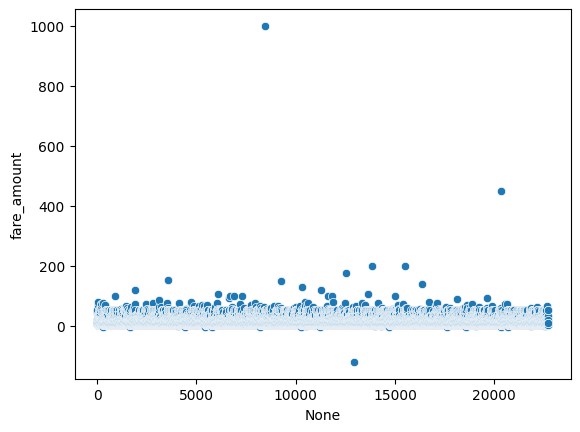

In [12]:
#이상치 확인하기
sns.scatterplot(x = trip_df.index, y = trip_df['fare_amount'])

In [13]:
#fare_amount 가 0 이하이거나, 400이상 인 값 제거 하기
trip_df = trip_df[trip_df['fare_amount']>0 ]
trip_df = trip_df[trip_df['fare_amount']<400]

In [14]:
#잘 제거 됐는지 확인하기 위해서 정렬해보기
trip_df['fare_amount'].sort_values()

,fare_amount
14285,0.01
4063,0.01
13972,1.00
17313,2.50
2225,2.50
...,...
9282,150.00
3584,152.00
12513,175.00
15476,200.00


In [19]:
#payment_method 값이 어떤것이 있는지 확인하기
trip_df['payment_method'].value_counts()

,count
payment_method,
Cash,11186
Debit Card,5776
Credit Card,5717


In [20]:
#Debit Card 와Credit Card 은 Card 로 통일 시켜주기
trip_df['payment_method'] = trip_df['payment_method'].replace(['Debit Card','Credit Card'],'Card')

In [21]:
trip_df['payment_method'].value_counts()

,count
payment_method,
Card,11493
Cash,11186


In [15]:
#tpep_pickup_datetime, tpep_dropoff_datetime를 datetime 형태로 바꾸기
trip_df['tpep_pickup_datetime'] = pd.to_datetime(trip_df['tpep_pickup_datetime'])
trip_df['tpep_dropoff_datetime'] = pd.to_datetime(trip_df['tpep_dropoff_datetime'])

In [16]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22679 entries, 0 to 22700
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   22679 non-null  datetime64[ns]
 1   tpep_dropoff_datetime  22679 non-null  datetime64[ns]
 2   payment_method         22679 non-null  object        
 3   passenger_count        22679 non-null  int64         
 4   trip_distance          22679 non-null  float64       
 5   fare_amount            22679 non-null  float64       
 6   tip_amount             22679 non-null  float64       
 7   tolls_amount           22679 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(1)
memory usage: 1.6+ MB


In [43]:
#드랍시간이랑 픽업시간 빼보기
trip_df['trip_time'] = trip_df['tpep_dropoff_datetime'] - trip_df['tpep_pickup_datetime']
trip_df['trip_time']

,trip_time
0,0 days 00:14:04
1,0 days 00:26:30
2,0 days 00:07:12
3,0 days 00:30:15
4,0 days 00:16:43
...,...
22696,0 days 00:03:16
22697,0 days 00:40:48
22698,0 days 00:04:08
22699,0 days 00:11:56


<Axes: xlabel='trip_time', ylabel='fare_amount'>

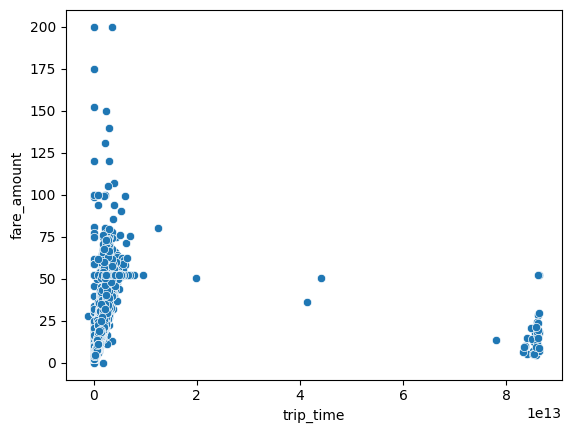

In [45]:
#시간과 금액 상관관계????????
sns.scatterplot(x='trip_time', y='fare_amount', data=trip_df)

시간이오래 됐다고 금액이 많이 나오는 것 같아 보이진 않는다.

<Axes: xlabel='trip_distance', ylabel='fare_amount'>

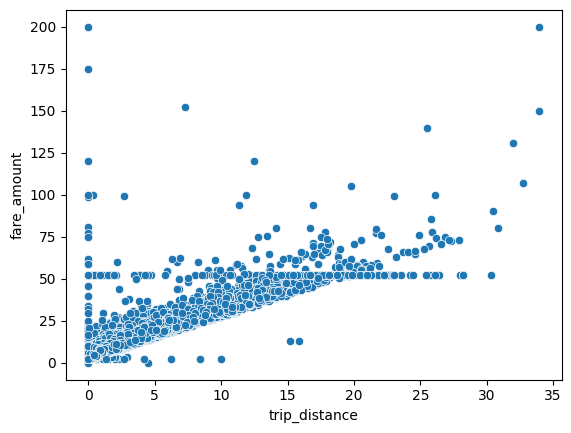

In [47]:
sns.scatterplot(x='trip_distance', y='fare_amount', data=trip_df)